In [1]:
import pyenzyme as pe

%load_ext autoreload
%autoreload 2
from EnzymePynetics.tools.parameterestimator import ParameterEstimator

In [2]:
enzmldoc = pe.EnzymeMLDocument.fromFile(
    "/Users/max/Library/Mobile Documents/com~apple~CloudDocs/Documents/code/papers/MTP_inhibition/data/SLAC/ABTS_oxidation_pH_3.0_and_25.0°C.omex"
)

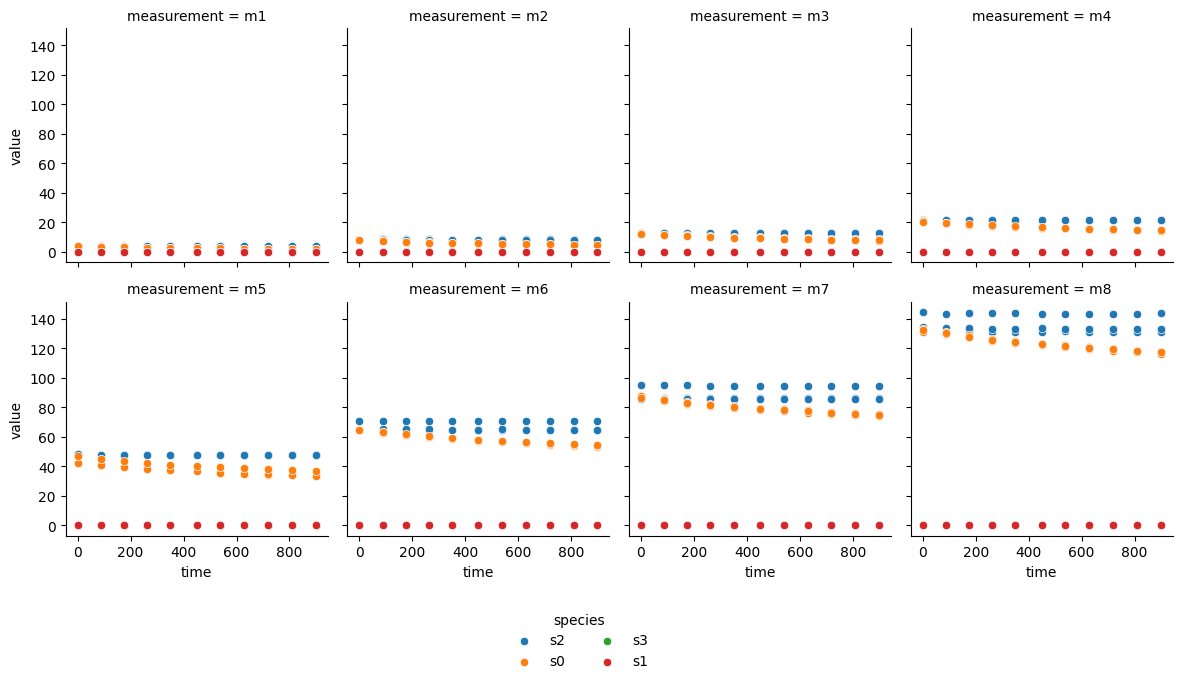

In [3]:
enzmldoc.visualize()

In [16]:
slac_parameters = ParameterEstimator.from_EnzymeML(
    enzmldoc=enzmldoc, measured_species_id="s0"
)
slac_parameters.fit_models()

Fitting data to:
 - irreversible Michaelis Menten model
 -- Fitting succeeded: True
 - irreversible Michaelis Menten with enzyme inactivation model
 -- Fitting succeeded: True
 - competitive product inhibition model
 -- Fitting succeeded: True
 - competitive product inhibition with enzyme inactivation model
 -- Fitting succeeded: True
 - uncompetitive product inhibition model
 -- Fitting succeeded: True
 - uncompetitive product inhibition with enzyme inactivation model
 -- Fitting succeeded: True
 - non-competitive product inhibition model
 -- Fitting succeeded: False
 - non-competitive product inhibition with enzyme inactivation model
 -- Fitting succeeded: True
 - substrate inhibition model
 -- Fitting succeeded: True
 - substrate inhibition with enzyme inactivation model
 -- Fitting succeeded: True


,AIC,RMSD,kcat [1/s],Km [umol / l],kcat / Km [1/s * 1/umol / l],ki time-dep enzyme-inactiv. [1/s],Ki competitive [umol / l],Ki uncompetitive [umol / l]
competitive product inhibition with enzyme inactivation,-647,0.289455,0.8834 +/- 8.05%,52.1943 +/- 6.89%,0.017 +/- 10.59%,0.0008 +/- 6.63%,7.4803 +/- 10.53%,-
non-competitive product inhibition with enzyme inactivation,-640,0.292072,0.9235 +/- 8.67%,54.7669 +/- 7.87%,0.017 +/- 11.71%,0.0008 +/- 7.22%,7.3406 +/- 10.59%,1000.0000 +/- 255.11%
competitive product inhibition,-483,0.396128,3.0236 +/- 43.66%,159.0945 +/- 3.45%,0.019 +/- 43.79%,-,3.1493 +/- 10.44%,-
irreversible Michaelis Menten with enzyme inactivation,-476,0.401024,0.4600 +/- 1.95%,35.1374 +/- 3.00%,0.013 +/- 3.58%,0.0013 +/- 4.47%,-,-
substrate inhibition with enzyme inactivation,-410,0.453232,0.5232 +/- 4.50%,43.2442 +/- 6.85%,0.012 +/- 8.20%,0.0013 +/- 5.05%,-,1000.0000 +/- 33.45%
uncompetitive product inhibition,-164,0.725067,0.3773 +/- 11.04%,47.3119 +/- 15.75%,0.008 +/- 19.23%,-,-,114.9252 +/- 59.90%
irreversible Michaelis Menten,-162,0.730161,0.3084 +/- 2.07%,35.4652 +/- 5.52%,0.009 +/- 5.89%,-,-,-
substrate inhibition,-138,0.761308,0.3507 +/- 2.27%,43.7210 +/- 5.61%,0.008 +/- 6.05%,-,-,999.9829 +/- 7.75%
uncompetitive product inhibition with enzyme inactivation,455,2.333152,39.5741 +/- 251177.54%,35.9746 +/- 48.39%,1.100 +/- 251177.55%,0.2469 +/- 250680.32%,-,999.9942 +/- 1332.37%


In [32]:
slac_parameters.visualize_model_overview()

TypeError: Type is not JSON serializable: function

TypeError: Type is not JSON serializable: function

TypeError: Type is not JSON serializable: function

Figure({
    'data': [{'customdata': [replicates],
              'hoverinfo': 'skip',
              'marker': {'color': 'rgba(0.7294117647058823, 0.6901960784313725, 0.6745098039215687, 1.0)'},
              'mode': 'markers',
              'name': '5.0',
              'showlegend': True,
              'type': 'scatter',
              'visible': False,
              'x': array([  0.,  88., 175., 262., 350., 449., 539., 629., 719., 809., 899.]),
              'y': array([3.82937905, 3.4493681 , 3.15636043, 2.90426862, 2.69833585, 2.49742642,
                          2.35826263, 2.26029679, 2.21903915, 2.15198427, 2.03847507])},
             {'customdata': [replicates],
              'hoverinfo': 'skip',
              'marker': {'color': 'rgba(0.7294117647058823, 0.6901960784313725, 0.6745098039215687, 1.0)'},
              'mode': 'markers',
              'name': '5.0',
              'showlegend': False,
              'type': 'scatter',
              'visible': False,
              'x'

In [22]:
def _format_unit(unit: str) -> str:
    unit = unit.replace(" / l", " L<sup>-1</sup>")
    unit = unit.replace(" / s", " s<sup>-1</sup>")
    unit = unit.replace(" / min", " min<sup>-1</sup>")
    unit = unit.replace("umol", "µmol")
    unit = unit.replace("ug", "µg")
    return unit


_format_unit("umol / l")

'µmol L<sup>-1</sup>'

In [13]:
import numpy as np

In [15]:
if np.any(slac_parameters.subset_inhibitor != 0):
    print("hi")

hi


In [7]:
d = {"a": [0, 1, 2], "b": [3, 4, 5], "c": [6, 7, 8]}


d.values()

np.log(1)

NameError: name 'np' is not defined

In [ ]:
import plotly.graph_objects as go
import numpy as np

In [ ]:
# Create figure
fig = go.Figure()
annotations_dict = []
# Add traces, one for each slider step
for step in np.arange(0, 2, 0.1):
    x_vec = np.arange(0, 1, 0.1)
    y_vec = np.sin(step * np.arange(0, 1, 0.1))
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="𝜈 = " + str(step),
            x=x_vec,
            y=y_vec,
        )
    )
    annotations = []
    for n in range(len(y_vec)):
        record = go.layout.Annotation(
            text=str("{:0.2f}".format(y_vec[n])),
            y=y_vec[n],
            x=x_vec[n],
            yref="y1",
            xref="x1",
            font=dict(color="#484848", size=12),
            showarrow=False,
        )
        annotations.append(record)
    annotations_dict.append(annotations)


# Make 10th trace visible
fig.data[10].visible = True

fig.update_layout(
    title="Frequency: Step-" + str(10),
    annotations=annotations_dict[10],
)

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[
            {"visible": [False] * len(fig.data)},  # update for traces
            {"title": "Frequency: Step-" + str(i), "annotations": annotations_dict[i]},
            # {"annotations": [False] * len(annotations_dict)}, # update for layout
        ],
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    # step["args"][2]["annotations"][i] = True  # Toggle i'th annotation to "visible"
    steps.append(step)

sliders = [
    dict(active=10, currentvalue={"prefix": "Frequency: "}, pad={"t": 50}, steps=steps)
]

fig.update_layout(sliders=sliders)

fig.show()

In [ ]:
import plotly.express as px

fig = px.line(
    x=[1, 2, 3, 4],
    y=[1, 4, 9, 16],
    title=r"$\alpha_{1c} = 352 \pm 11 \text{ km s}^{-1}$",
)
fig.update_layout(
    xaxis_title=r"$\sqrt{(n_\text{c}(t|{T_\text{early}}))}$",
    yaxis_title=r"$d, r \text{ (solar radius)}$",
)
fig.show()